# Plotting graphs on Pokemon CSV 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
df = pd.read_csv("pokemon.csv")

print(df.head())

print(df.columns)

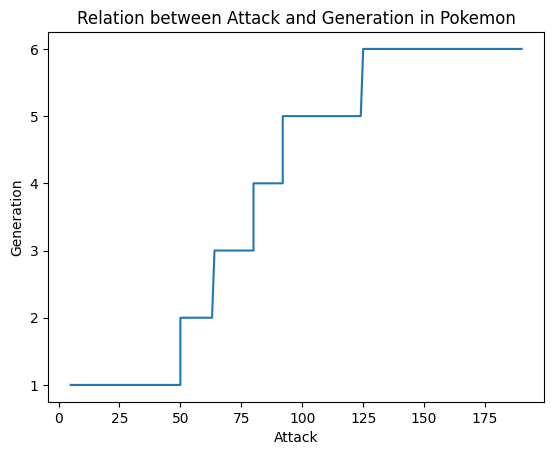

In [11]:
# So I will start with Matplotlib graphs and first one is Line plot

df_sorted = df.sort_values("Attack")
plt.plot(df_sorted["Attack"], df["Generation"])
plt.xlabel("Attack")
plt.ylabel("Generation")
plt.title("Relation between Attack and Generation in Pokemon")
plt.show()

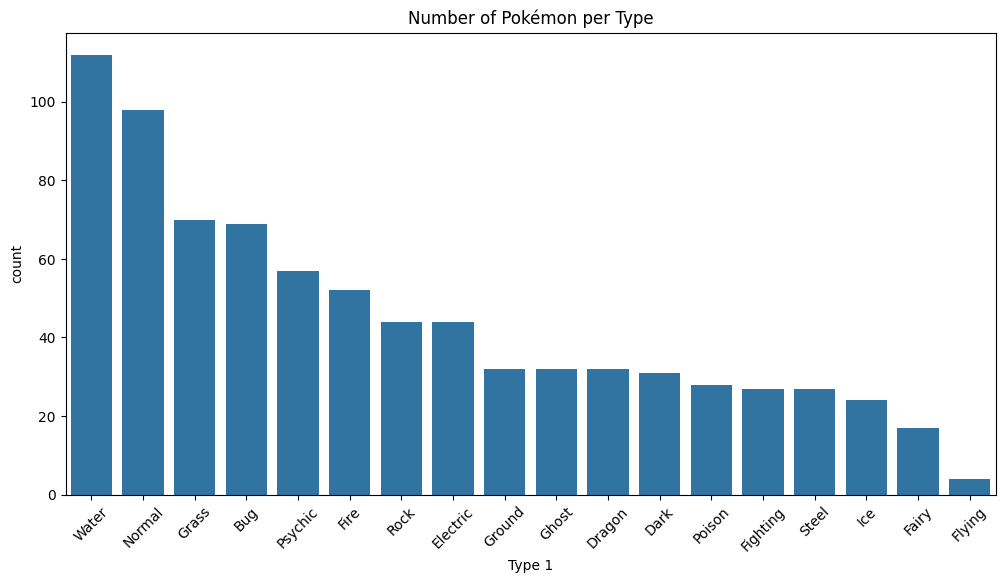

In [10]:
# the bar chart will come here
plt.figure(figsize=(12,6))
sea.countplot(x="Type 1", data=df, order=df["Type 1"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Pokémon per Type")
plt.show()

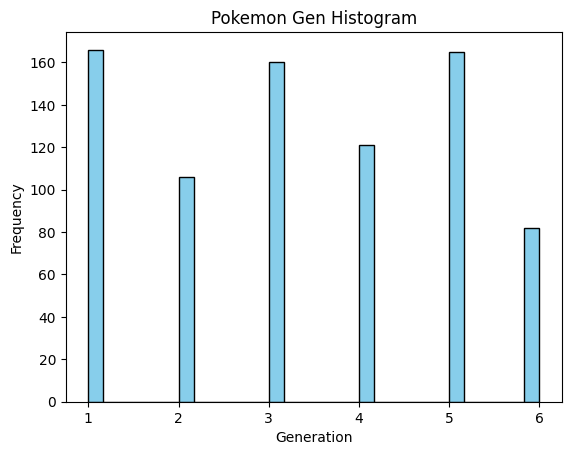

In [12]:
# now the histogram
plt.hist(df["Generation"], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.title('Pokemon Gen Histogram')

# Display the plot
plt.show()

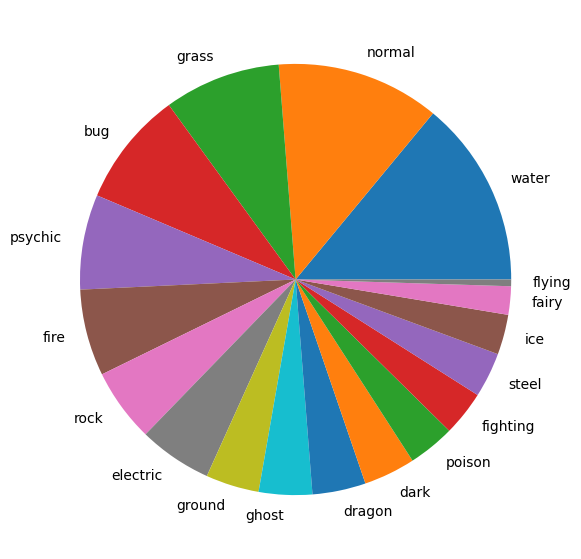

In [13]:
# pie chart 

# clean column
column_cleaned = df["Type 1"].apply(lambda x: x.strip().lower())

# count
counts = column_cleaned.value_counts()

value = counts.values # it will tell how many
label = counts.index #will tell the types..name or say title
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(value, labels=label)

#show plot
plt.show()

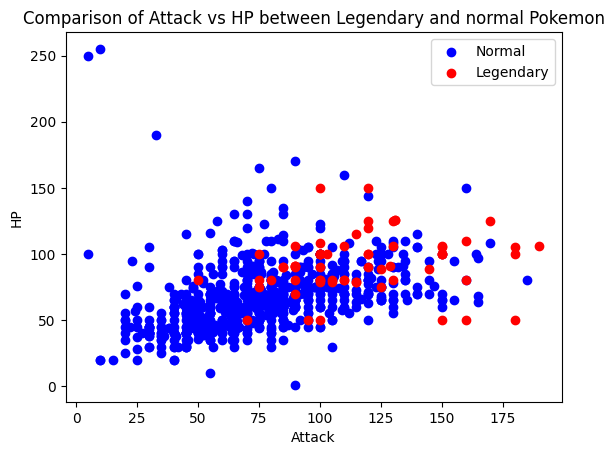

In [14]:
# scatter plot
normal_pokemon = df[df["Legendary"] == False]
legend_pokemon = df[df["Legendary"] == True]

plt.scatter(normal_pokemon["Attack"], normal_pokemon["HP"],color='blue',label='Normal')
plt.scatter(legend_pokemon["Attack"], legend_pokemon["HP"],color='red',label='Legendary')
plt.xlabel("Attack")
plt.ylabel("HP")
plt.title('Comparison of Attack vs HP between Legendary and normal Pokemon')
plt.legend()
plt.show()

<Axes: xlabel='Generation', ylabel='count'>

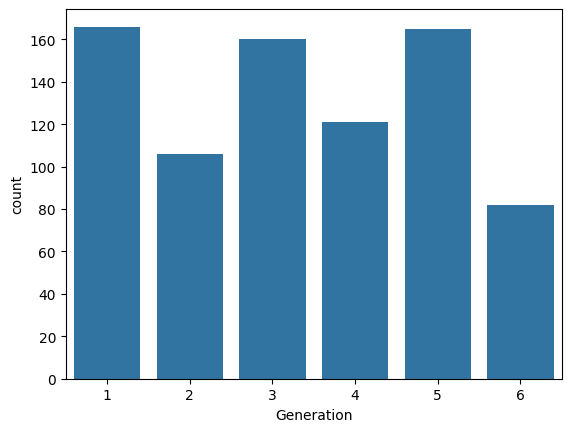

In [15]:
# Now the SEABORN graphs will come...so first one is Countplot
#A countplot basically counts the categories and returns a count of their occurrences. It is one of the simplest plots provided by the seaborn library.

sea.countplot(x ='Generation', data = df) 
#kinda same as histogram 

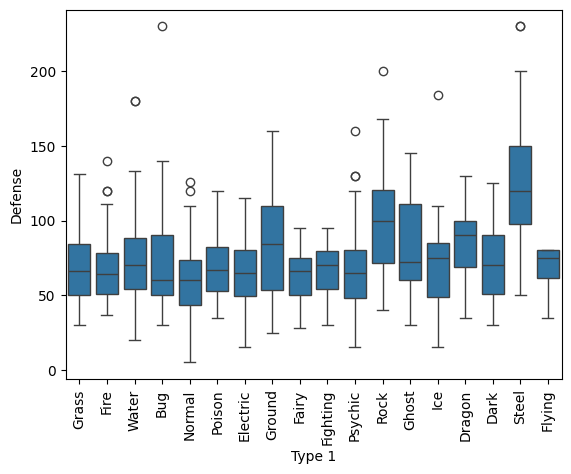

In [16]:
#boxplot

sea.boxplot(x='Type 1', y='Defense',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Legendary', ylabel='Speed'>

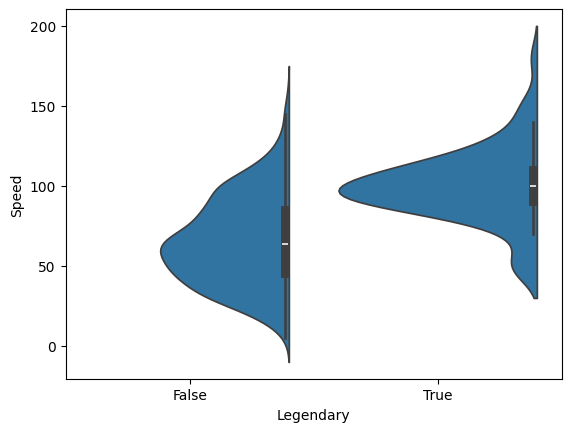

In [17]:
# violin plot(boxplot+KDE)

sea.violinplot(x='Legendary', y='Speed', data=df, split=True)


## Violinplot is similar to the boxplot except that it provides a higher, more advanced visualization and uses the kernel density estimation to give a betterdescription about the data distribution.

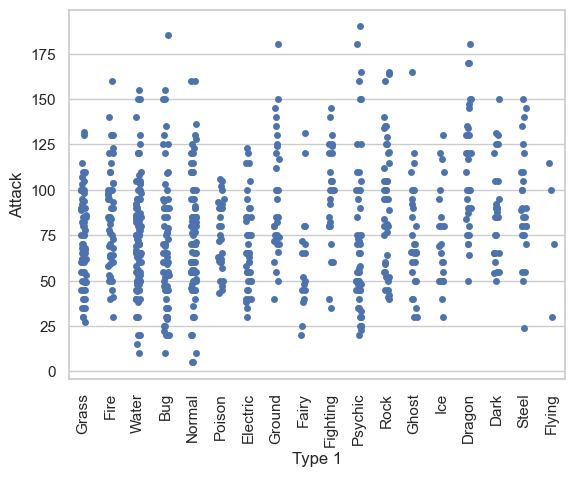

In [19]:
#stripplot
#Categorical data is represented on the x-axis and values correspond to them represented through the y-axis.

# use to set style of background of plot
sea.set(style="whitegrid")

# Basic stripplot
sea.stripplot(x="Type 1", y="Attack", data=df, jitter=True)

plt.xticks(rotation=90)  # rotate x-labels so they don’t overlap
plt.show()


## jitter parameter is used to add an amount of jitter (only along the categorical axis) which can be useful when you have many points and they overlap so that it is easier to see the distribution.

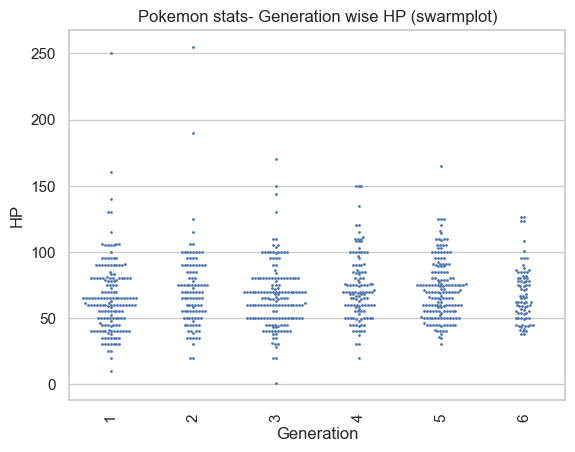

In [20]:
# / swarmplot

sea.swarmplot(x="Generation", y="HP", data=df,size =2)

plt.xticks(rotation=90)  # rotate x-labels so they don’t overlap
# giving title to the plot
plt.title('Pokemon stats- Generation wise HP (swarmplot)')

plt.show()


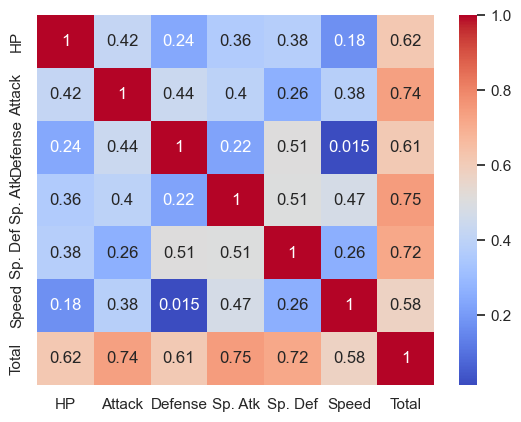

In [21]:
#heatmap

# pick only numeric columns
numeric_df = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]]

# make correlation matrix
corr = numeric_df.corr()

# plot heatmap
sea.heatmap(corr, annot=True, cmap="coolwarm")

plt.show()


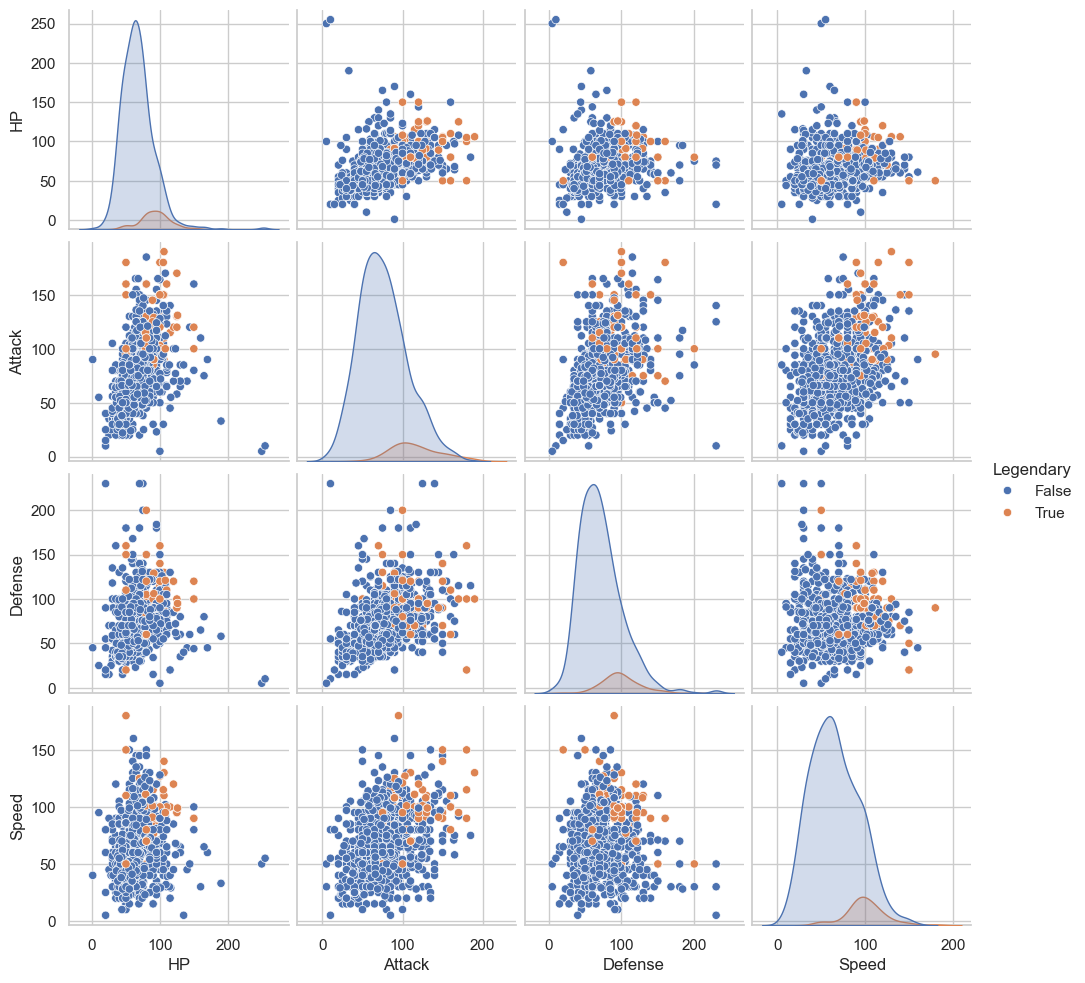

In [22]:
#Pairplot (scatterplots between multiple features)
sea.pairplot(
    df[["HP", "Attack", "Defense", "Speed", "Legendary"]],
    hue="Legendary"
)